In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from rho_rand import rho_rand_routine, SecondaryUser


## Single example Rho_rand strategy
This next run is designed just to show the results we obtain with rho_rand


In [2]:
#  UNIVERSE PARAMETERS
n_users = 3
n_arms = 5
t_horizon = 1000
arm_means = [0.2, 0.3, 0.5, 0.8, 0.9]

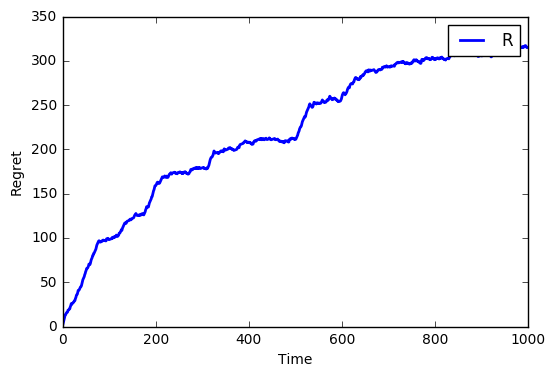

In [3]:
dummy_r = rho_rand_routine(n_users, n_arms, t_horizon, arm_means, alg='ucb', plot=True)

## Expected regret curve
This next section is designed to show the expected regret curve using a Monte-Carlo strategy.

In [4]:
# MONTE-CARLO PARAMETERS
mc_horizon = 50
rewards = np.zeros((mc_horizon, t_horizon))

In [5]:
for t in range(mc_horizon):
    rewards[t, :] = rho_rand_routine(n_users, n_arms, t_horizon, arm_means)[:, 0]

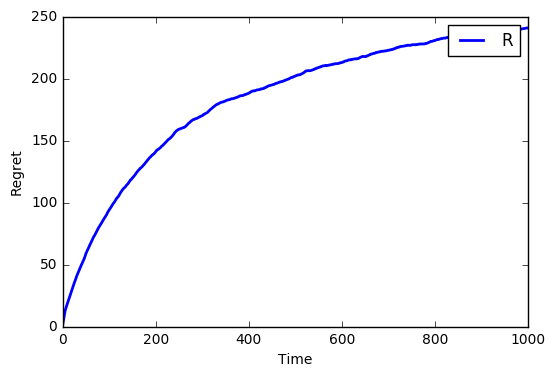

In [6]:
expected_rewards = np.mean(rewards, axis=0)
best_arms = np.sort(np.array(arm_means))[-n_users:]
expected_regret = np.cumsum(best_arms.sum() - expected_rewards)
plt.plot(range(t_horizon), expected_regret, linewidth=2)
plt.ylabel("Regret")
plt.xlabel("Time")
plt.legend("Regret function of time for TDFS using UCB")
plt.show()